In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("kidney_disease.csv")

In [3]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_columns",100) #to display all the columns in the dataset
data.drop(['id','sod','pot','rc','wc','rbc'],axis=1,inplace=True)


In [6]:
data.shape

(400, 20)

In [7]:
data.shape

(400, 20)

In [8]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'hemo', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [9]:
data['age'].fillna(data['age'].mean(),inplace=True)
data['bp'].fillna(data['bp'].mean(),inplace=True)
data['sg'].fillna(data['sg'].mean(),inplace=True)
data['al'].fillna(data['al'].mean(),inplace=True)
data['su'].fillna(data['su'].mean(),inplace=True)
data['bgr'].fillna(data['bgr'].mean(),inplace=True)
data['bu'].fillna(data['bu'].mean(),inplace=True)
data['sc'].fillna(data['sc'].mean(),inplace=True)
data['hemo'].fillna(data['hemo'].mean(),inplace=True)


In [10]:
data.isnull().any()

age               False
bp                False
sg                False
al                False
su                False
pc                 True
pcc                True
ba                 True
bgr               False
bu                False
sc                False
hemo              False
pcv                True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [11]:
for column in ['pc', 'pcc', 'ba', 'htn','dm','cad','appet','pe','ane']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [12]:
data.drop(['pcv'],axis=1,inplace=True)

In [13]:
data.shape

(400, 19)

In [14]:
data.isnull().any()

age               False
bp                False
sg                False
al                False
su                False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
hemo              False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [15]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [16]:
data["classification"].replace({"ckd\t": "ckd"}, inplace=True)
print(data)

      age    bp     sg   al   su        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0    normal  notpresent  notpresent   

            bgr    bu   sc  hemo  htn   dm cad appet   pe  ane classification  
0    121.000000  36.0  1.2  15.4  yes  yes  no  good   no   no            ckd  

In [17]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [18]:
print(250/400) #62.5% patients having ckd while 37.5% not ckd individuals

0.625


In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['classification']=lb.fit_transform(data['classification'])
data['htn']=lb.fit_transform(data['htn'])
data['dm']=lb.fit_transform(data['dm'])
data['cad']=lb.fit_transform(data['cad'])
data['appet']=lb.fit_transform(data['appet'])
data['pe']=lb.fit_transform(data['pe'])
data['ane']=lb.fit_transform(data['ane'])
data['pc']=lb.fit_transform(data['pc'])
data['pcc']=lb.fit_transform(data['pcc'])
data['ba']=lb.fit_transform(data['ba'])


In [20]:
data.corr()


,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.101951,0.159074,0.043573,0.214410,0.187544,0.127316,-0.175380,0.393440,0.293743,0.225692,0.157741,0.094434,0.050567,-0.225405
bp,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.156856,0.059560,0.112173,0.149100,0.183970,0.144359,-0.279535,0.270447,0.152211,0.072585,0.177601,0.054083,0.194962,-0.290600
sg,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.345325,-0.290663,-0.220792,-0.326339,-0.278568,-0.213513,0.531755,-0.366959,-0.250773,-0.125424,-0.246822,-0.272476,-0.213276,0.698957
al,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.535157,0.399749,0.367855,0.326400,0.405778,0.230479,-0.549697,0.481724,0.269855,0.228579,0.330562,0.440893,0.282305,-0.599238
su,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.168826,0.151445,0.107684,0.639186,0.152186,0.130122,-0.191518,0.293179,0.404278,0.245523,0.080648,0.130721,0.066348,-0.327812
pc,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,1.000000,-0.520118,-0.330401,-0.262259,-0.344048,-0.157896,0.411500,-0.291719,-0.167356,-0.152519,-0.274985,-0.350227,-0.260566,0.375154
pcc,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.520118,1.000000,0.275082,0.197593,0.184415,0.049940,-0.275763,0.195623,0.160626,0.187283,0.189688,0.104356,0.175861,-0.265313
ba,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.330401,0.275082,1.000000,0.085940,0.158444,0.050830,-0.204954,0.089046,0.083363,0.160807,0.149126,0.134732,0.052208,-0.186871
bgr,0.214410,0.149100,-0.326339,0.326400,0.639186,-0.262259,0.197593,0.085940,1.000000,0.127489,0.082242,-0.269149,0.369849,0.419959,0.210811,0.176132,0.101502,0.126854,-0.401374
bu,0.187544,0.183970,-0.278568,0.405778,0.152186,-0.344048,0.184415,0.158444,0.127489,1.000000,0.581222,-0.540641,0.388383,0.252041,0.211659,0.272994,0.338274,0.435425,-0.372033


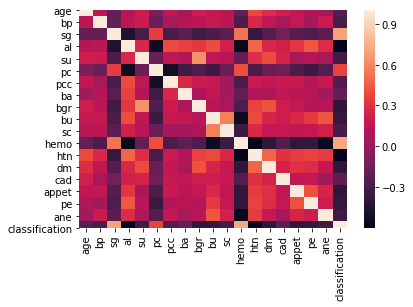

In [21]:
sns.heatmap(data.corr())

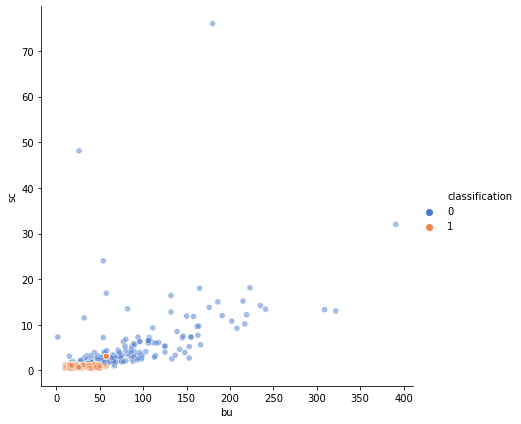

In [22]:
sns.relplot(x="bu", y="sc", hue="classification",
            sizes=(40, 400), palette="muted",alpha=0.5,
            height=6, data=data)


Text(0, 0.5, 'Blood Glucose')

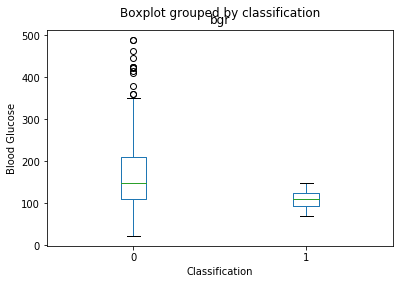

In [23]:
ax=data.boxplot(by ='classification', column =['bgr'], grid = False)
ax.set_xlabel('Classification')
ax.set_ylabel('Blood Glucose')


Text(0, 0.5, 'Specific Gravity')

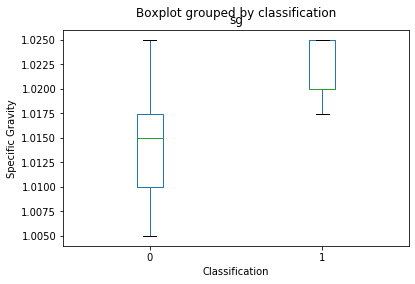

In [24]:
bx=data.boxplot(by ='classification', column =['sg'], grid = False)
bx.set_xlabel('Classification')
bx.set_ylabel('Specific Gravity')


In [25]:
data.drop(['su','bu','dm','cad','ane','appet','pe'],axis=1,inplace=True)
data


,age,bp,sg,al,pc,pcc,ba,bgr,sc,hemo,htn,classification
0,48.0,80.0,1.020,1.0,1,0,0,121.000000,1.2,15.4,1,0
1,7.0,50.0,1.020,4.0,1,0,0,148.036517,0.8,11.3,0,0
2,62.0,80.0,1.010,2.0,1,0,0,423.000000,1.8,9.6,0,0
3,48.0,70.0,1.005,4.0,0,1,0,117.000000,3.8,11.2,1,0
4,51.0,80.0,1.010,2.0,1,0,0,106.000000,1.4,11.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,1,0,0,140.000000,0.5,15.7,0,1
396,42.0,70.0,1.025,0.0,1,0,0,75.000000,1.2,16.5,0,1
397,12.0,80.0,1.020,0.0,1,0,0,100.000000,0.6,15.8,0,1
398,17.0,60.0,1.025,0.0,1,0,0,114.000000,1.0,14.2,0,1


In [26]:
data.drop(['age','pcc','ba'],axis=1,inplace=True)

In [27]:
data.shape
data.drop(['bp'],axis=1,inplace=True)

In [28]:
data

,sg,al,pc,bgr,sc,hemo,htn,classification
0,1.020,1.0,1,121.000000,1.2,15.4,1,0
1,1.020,4.0,1,148.036517,0.8,11.3,0,0
2,1.010,2.0,1,423.000000,1.8,9.6,0,0
3,1.005,4.0,0,117.000000,3.8,11.2,1,0
4,1.010,2.0,1,106.000000,1.4,11.6,0,0
...,...,...,...,...,...,...,...,...
395,1.020,0.0,1,140.000000,0.5,15.7,0,1
396,1.025,0.0,1,75.000000,1.2,16.5,0,1
397,1.020,0.0,1,100.000000,0.6,15.8,0,1
398,1.025,0.0,1,114.000000,1.0,14.2,0,1


In [29]:
x=data.iloc[:,:7].values
x


array([[1.02000000e+00, 1.00000000e+00, 1.00000000e+00, 1.21000000e+02,
        1.20000000e+00, 1.54000000e+01, 1.00000000e+00],
       [1.02000000e+00, 4.00000000e+00, 1.00000000e+00, 1.48036517e+02,
        8.00000000e-01, 1.13000000e+01, 0.00000000e+00],
       [1.01000000e+00, 2.00000000e+00, 1.00000000e+00, 4.23000000e+02,
        1.80000000e+00, 9.60000000e+00, 0.00000000e+00],
       [1.00500000e+00, 4.00000000e+00, 0.00000000e+00, 1.17000000e+02,
        3.80000000e+00, 1.12000000e+01, 1.00000000e+00],
       [1.01000000e+00, 2.00000000e+00, 1.00000000e+00, 1.06000000e+02,
        1.40000000e+00, 1.16000000e+01, 0.00000000e+00],
       [1.01500000e+00, 3.00000000e+00, 1.00000000e+00, 7.40000000e+01,
        1.10000000e+00, 1.22000000e+01, 1.00000000e+00],
       [1.01000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+02,
        2.40000000e+01, 1.24000000e+01, 0.00000000e+00],
       [1.01500000e+00, 2.00000000e+00, 0.00000000e+00, 4.10000000e+02,
        1.10000000e+00, 1

In [30]:
y=data.iloc[:,7:].values
y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.975

In [34]:
#Overfit model
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
accuracy_score(y_test,y_pred2)

1.0

In [36]:
#Overfit model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(metric='minkowski',n_neighbors=5, p=2)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
accuracy_score(y_test,y_pred3)

1.0